In [1]:
%pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


## Изучение данных из файла

In [2]:
import pandas as pd # <импорт библиотеки pandas>
import matplotlib.pyplot as plt #импорт библиотеки
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# <чтение файла с данными с сохранением в df>
df.info()# <получение общей информации о данных в таблице df>
df.head(10) # <получение первых 10 строк таблицы df>
df.describe() #изучение числовых данных таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Всего в таблице 22 столбцов, типы данных: bool(2), float64(14), int64(3), object(3). Количество значений в столбцах различается, что говорит о том, что в данных есть пропущенные значения. Кроме этого обнаружены сл. проблемы: в  "total_area", "rooms", "ceiling_height", "floors_total", "living_area", "kitchen_area" максимальные значения выглядят неправдоподобно. Есть столбцы с неправильными типами данных.

## Предобработка данных

In [3]:
display(df.isnull().sum()) # <суммарное количество пропусков
#замена пропущеных занчений
df['balcony']=df['balcony'].fillna(0) 
df['locality_name']=df['locality_name'].fillna('unknown') 
df['is_apartment']=df['is_apartment'].fillna('False')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# корретировка типов данных
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').fillna(0)
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int') 
df['last_price'] = df['last_price'].astype('int') 
df['locality_name']=df['locality_name'].str.lower()
#выборка, где число комнат не равно 0.
df =df.query('rooms!=0') 


In [5]:
 #заменяем пропуски медианой по каждой группе
med_living_area = df.groupby('total_area')['living_area'].transform('median') 
df['living_area'] = df['living_area'].fillna(med_living_area)

med_kitchen_area = df.groupby('total_area')['kitchen_area'].transform('median') 
df['kitchen_area'] = df['kitchen_area'].fillna(med_kitchen_area) 

med_ceiling_height = df.groupby('total_area')['ceiling_height'].transform('median') 
df['ceiling_height'] = df['ceiling_height'].fillna(med_ceiling_height) 


In [6]:
# удаление пропуков в группах, для которых не получилось найти медиану
df.dropna(subset = ['living_area'], inplace = True)
df.dropna(subset = ['kitchen_area'], inplace = True)
df.dropna(subset = ['ceiling_height'], inplace = True)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               53
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5261
cityCenters_nearest      5238
parks_around3000         5237
parks_nearest           14951
ponds_around3000         5237
ponds_nearest           14082
days_exposition          3098
dtype: int64

### Вывод

В столбцах "ceiling_height", "floors_total", "living_area", "kitchen_area", "balcony", "is_apartment" скорее всего появились пропуски из-за ошибок людей, заполняющих объявления. И если можно не знать высоты потолков и жилой/куханной площади (хотя это и странно для людей, занимающихся продажей квартиры), то не занать этажность дома - очень подозрительно. Когда не указано число балконов — это означает, что их нет, значения заменены на ноль, тип данных поменян на целочисленный. Пропуски в "is_apartment" заменены на False, так как похоже, что люди просто пропускали этот пункт, когда сдавали не апартаменты. Тип столбца был заменен на булев.
Судя по коэф. корреляции, заполнять пропуски в высоте потолка и жилых и куханных площадях стоит по групперовке по общей площади.Значения, для которых нет походящей площади удаляем.
Пропуски в столбцах "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest", "days_exposition", "locality_name" - технические ошибки, о которых следует сообщить коллегам, отвечающим за выгрузку данных. Пропуски в "days_exposition" могли появится, так как в нем отражается, сколько дней было размещено объявление, а в выборку могли попасть еще не снятые объявления. Пропуски в "locality_name" были заменены на unknown, и все значения преведены в нижний регистр для удобства дальнейшей работы с данными.
Дата публикации переведена в формат времени, а цена  в целочисленный.

## Расчёты и добавление результатов в таблицу

In [7]:
df['price_per_m2'] = df['last_price'] / df['total_area'] #рассчет цены за метр кв.
df['price_per_m2']=df['price_per_m2'].astype('int') #замена типа данных на целочисленной

df['weekday']=df['first_day_exposition'].dt.weekday #определения дня недели публикации объявления
df['year'] = df['first_day_exposition'].dt.year #определения года публикации объявления
df['month'] = df['first_day_exposition'].dt.month #определения месяца публикации объявления


def gr_floors(row): #распределение квартр по этпжпм
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

df['floor_category'] = df.apply(gr_floors, axis = 1) 
df.dropna(subset = ['floor_category'], inplace = True)

df['live_total'] = df['living_area'] / df['total_area'] #соотношение жилой площади к общей
df['kitch_total'] = df['kitchen_area'] / df['total_area'] #соотношение площади кухни к общей
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,year,month,floor_category,live_total,kitch_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,120370,3,2019,3,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.70,11.0,18.6,1,True,...,0.0,NaN,81.0,82920,1,2018,12,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,True,...,2.0,574.0,558.0,92785,3,2015,8,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,3.14,14.0,95.0,9,True,...,3.0,234.0,424.0,408176,4,2015,7,другой,0.597484,0.094340
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121.0,100000,1,2018,6,другой,0.320000,0.410000


## Исследовательский анализ данных

### Изучение  параметров 

In [8]:
# составление списка столбцов для построения графика
list_displot = ['total_area', 'live_total', 'kitch_total', 'price_per_m2', 'rooms', 'ceiling_height']

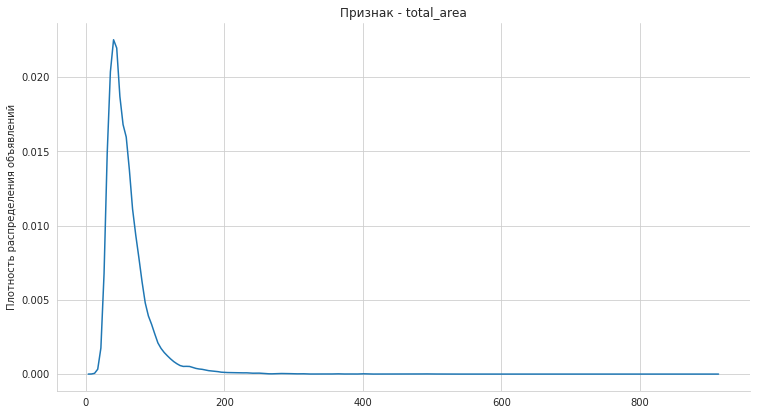

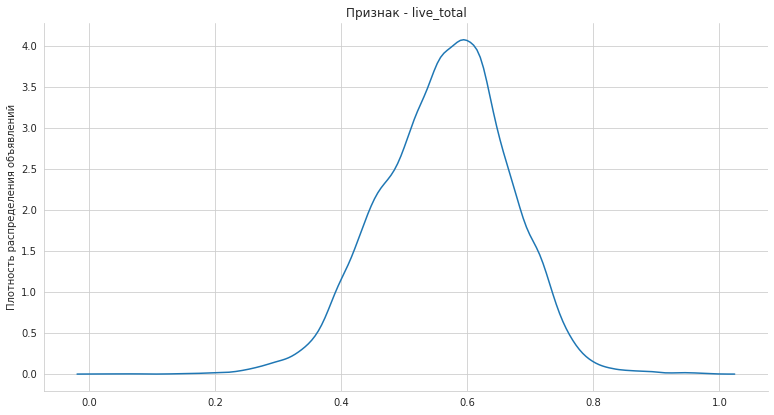

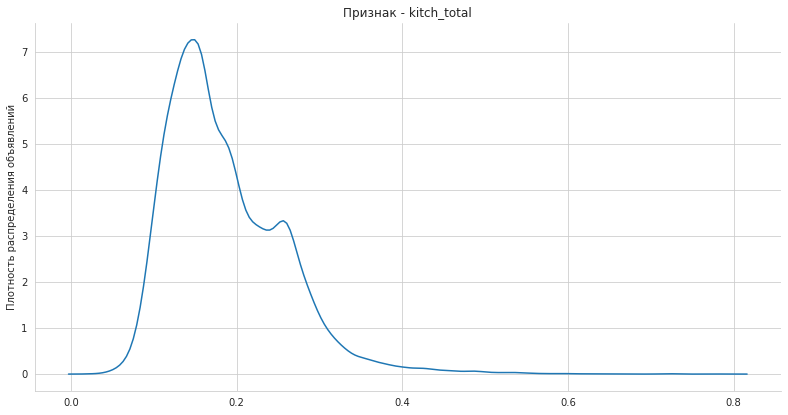

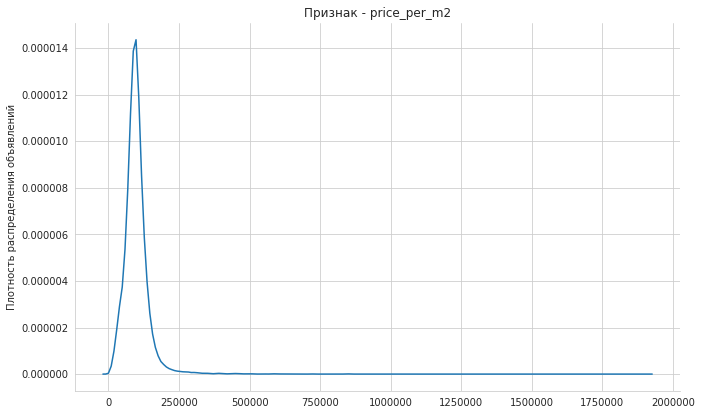

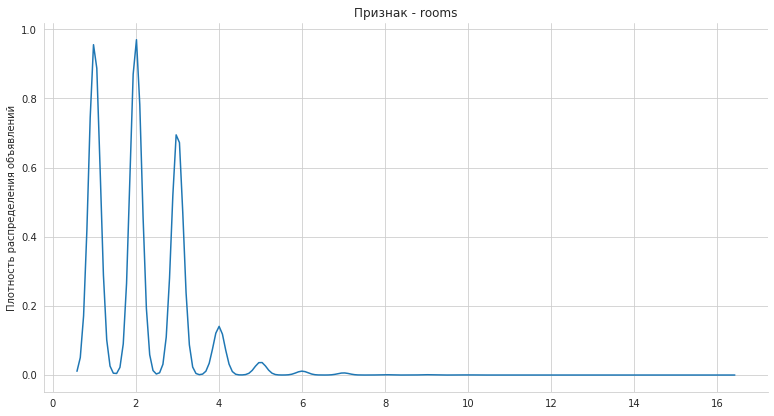

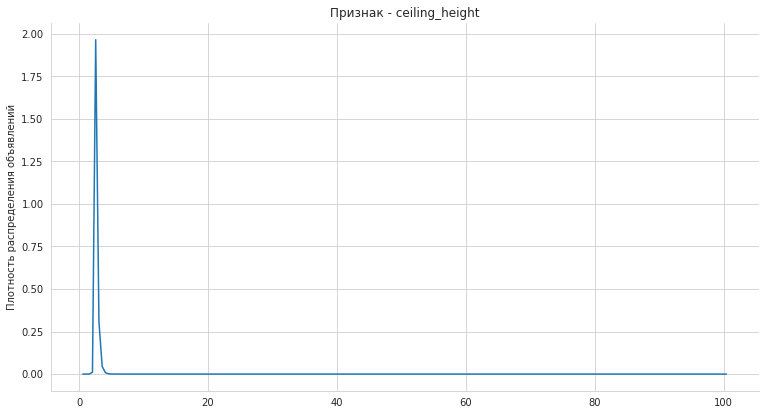

In [9]:
# построение графиков 
for f in list_displot:
    sns.set_style("whitegrid")
    g = sns.displot(data=df, x=df[f], kind='kde' )
    plt.title(f'Признак - {f}')
    plt.ylabel("Плотность распределения объявлений")
    plt.xlabel("")
    g.fig.set_figwidth(12)
    g.fig.set_figheight(6)
    plt.show()

Вывод

Данные в столбце с общей площади имеют нормальное распределение, медиана и среднее имеют не сильное расхождение. Ограничим выборку 114,7 м.кв.

Данные в столбце с соотношеним жилой площади к общей имеют нормальное распределение, медиана и среднее равны примерно 0,6. Ограничим: от 0.29668 до 0.834552.

Данные в столбце с соотношеним площади кухни к общей имеют нормальное распределение, медиана и среднее близки и равны 0,19-0,17%. Ограничим: до 0.3719435.

Данные в столбце с ценой за м.кв. имеют нормальное распределение, медиана и среднее близки по значению и равны около 100тыс. за м.кв. Ограничис выборку от 20062.8 до 170482 тыс. за м.кв.

Данные в столбце с кол-вом комнат имеют распределение Пуассона, медиана и среднее близки по значению и равны 2. Ограничим до 6 комнат.

Данные в столбце c высотjq поталка имеют нормальное распределение, медиана и среднее близки по значению и равны около 2,5. Но т.к. потолки более 4 метров выглядят неправдопоодобно, ограничем метраж 3,05 м. 

### Изучиние времени продажи квартиры.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,year,month,live_total,kitch_total
count,15897.000000,1.589700e+04,15897.000000,15897.000000,15897.000000,15859.000000,15897.000000,15897.000000,15897.000000,15897.000000,...,4834.000000,12127.000000,5581.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000,15897.000000
mean,9.662452,4.796141e+06,52.397819,1.907656,2.636654,11.056056,29.920466,6.046927,9.321369,0.611436,...,491.966487,0.660675,542.765633,124.443291,91496.977291,2.588979,2017.360382,6.576838,0.562425,0.187180
std,5.551690,2.295531e+06,17.610674,0.856473,0.126693,6.611545,12.263058,4.939869,3.372546,0.949493,...,329.286805,0.856169,273.785966,117.908073,27012.053061,1.791897,0.845604,3.492176,0.092599,0.061306
min,0.000000,6.300000e+05,17.000000,1.000000,2.250000,1.000000,10.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,2.000000,20063.000000,0.000000,2015.000000,1.000000,0.300000,0.043524
25%,6.000000,3.300000e+06,39.000000,1.000000,2.550000,5.000000,18.000000,2.000000,7.000000,0.000000,...,298.250000,0.000000,330.000000,40.000000,75000.000000,1.000000,2017.000000,3.000000,0.498971,0.139535
50%,9.000000,4.300000e+06,48.000000,2.000000,2.600000,9.000000,29.000000,5.000000,8.900000,0.000000,...,458.000000,0.000000,534.000000,81.000000,92105.000000,3.000000,2017.000000,7.000000,0.566540,0.175373
75%,14.000000,5.750000e+06,62.300000,3.000000,2.700000,16.000000,38.200000,8.000000,10.900000,1.000000,...,616.750000,1.000000,753.000000,177.000000,108108.000000,4.000000,2018.000000,10.000000,0.626506,0.231231
max,50.000000,1.870000e+07,114.600000,6.000000,3.050000,60.000000,87.000000,33.000000,42.800000,5.000000,...,3190.000000,3.000000,1344.000000,500.000000,170464.000000,6.000000,2019.000000,12.000000,0.800000,0.400000


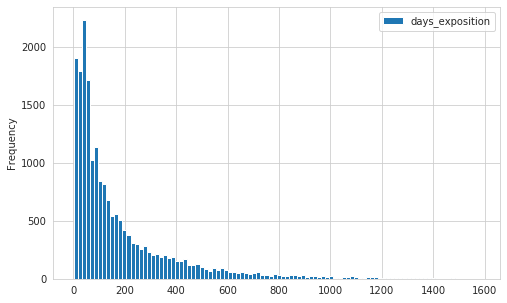

In [10]:
df['days_exposition'].describe() #изучение данных о продолжительности публикации
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize = (8,5)) #построение графика продолжительности публикаций

 #выборка данных без вбросов
df_good = df.query(' 1 < days_exposition <= 500 and total_area <=114.7 and 2.25 <= ceiling_height <= 3.05 and 0.3 <= live_total <=0.8 and kitch_total <= 0.4 and 20062.8 <= price_per_m2 <= 170482 and rooms <= 6')
df_good.describe()

Вывод

Данные в столбце кол-во дней на сайте имеют распределение Пуассона. Медиана и среднее отличатся почти в 2 раза. Нормальный размах: от 1 дня до 500 дне. меньше 0 - слишком быстро, больше 500 - слишком медленно.
Заметен пик на 45 днях, который может быть связан с автоматическим снятием неактивных объявлений.

### Факторы, влияющие на стоимость квартиры

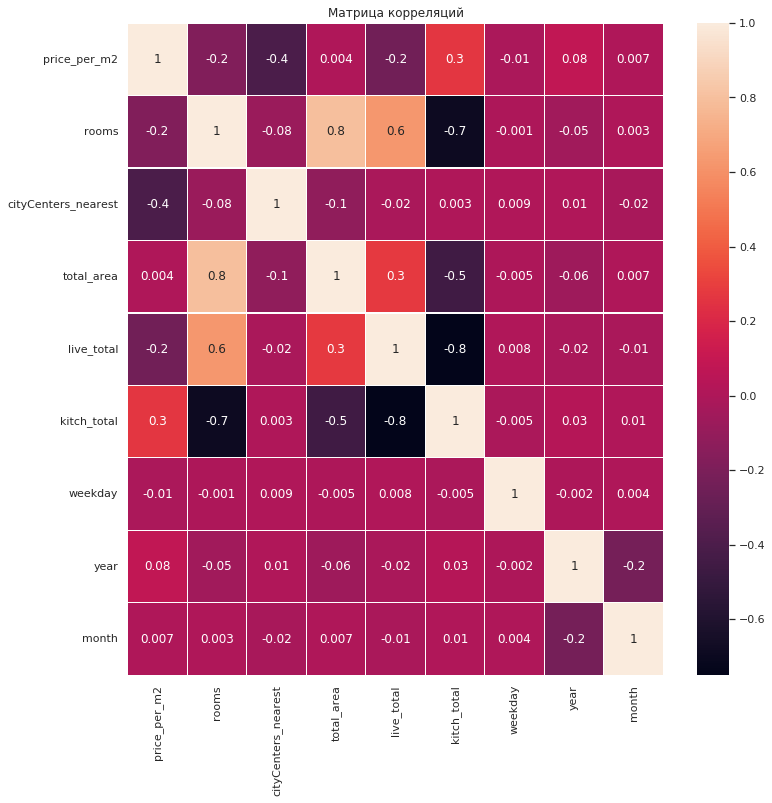

In [11]:
df_good_stat = df_good.loc[:,['price_per_m2', 'rooms', 'cityCenters_nearest','floor_category','total_area','live_total', 'kitch_total', 'weekday','year','month']] 

sns.set(style='white')
plt.figure(figsize=(12, 12))
plt.title('Матрица корреляций')
sns.heatmap(df_good_stat.corr(), annot=True, fmt='.1g', linewidths=0.25, linecolor='white') #построение таблицы коэффициентов корреляции
plt.show()

In [12]:
list_scatterplot = ['total_area', 'live_total', 'kitch_total']
list_lineplot = ['rooms', 'cityCenters_nearest', 'floor_category', 'year', 'month', 'weekday']

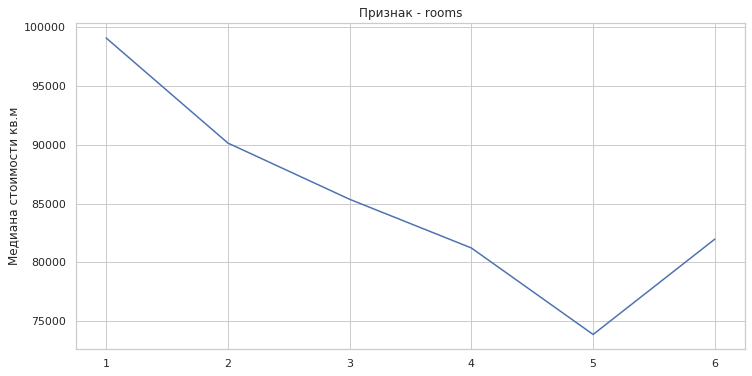

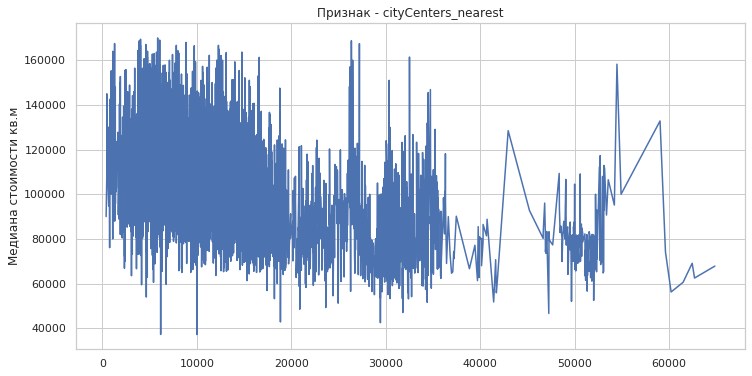

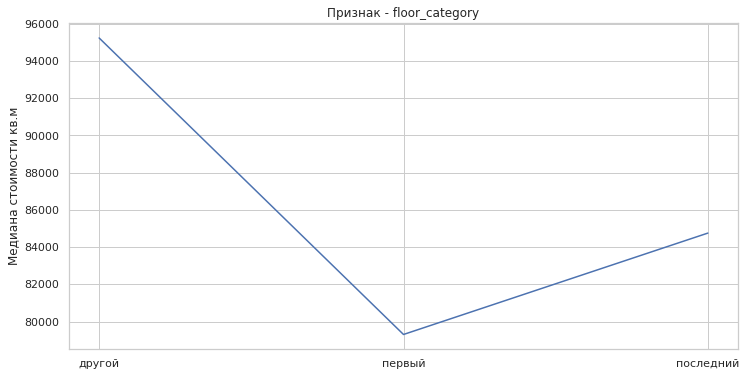

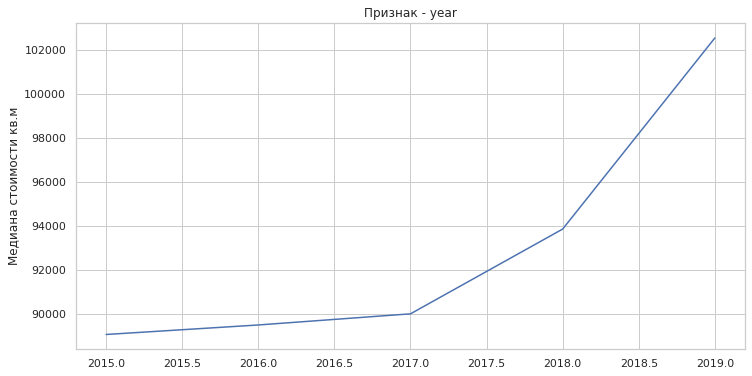

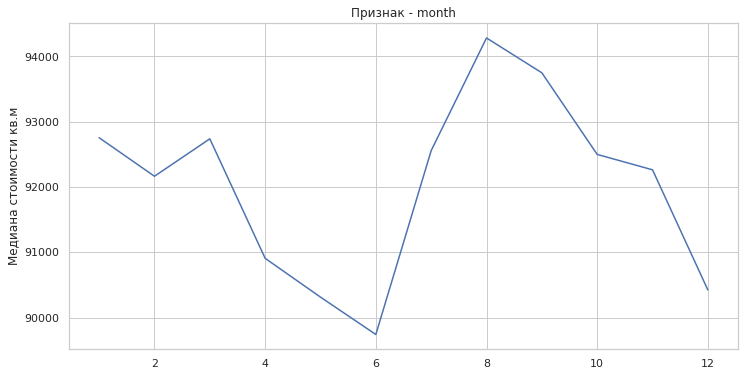

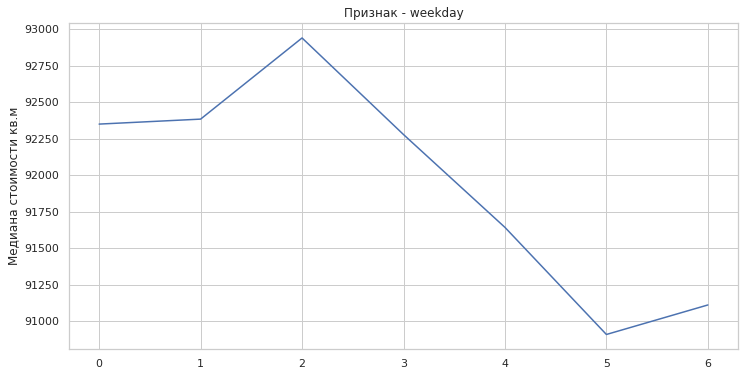

In [13]:
# построение линейных графиков 
for f in list_lineplot:
    new_df=df_good.pivot_table(index=df[f], values='price_per_m2', aggfunc='median')
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12,6))
    g = sns.lineplot(data=new_df, x=new_df.index, y='price_per_m2')
    plt.title(f'Признак - {f}')
    plt.ylabel("Медиана стоимости кв.м")
    plt.xlabel("")
    plt.show()

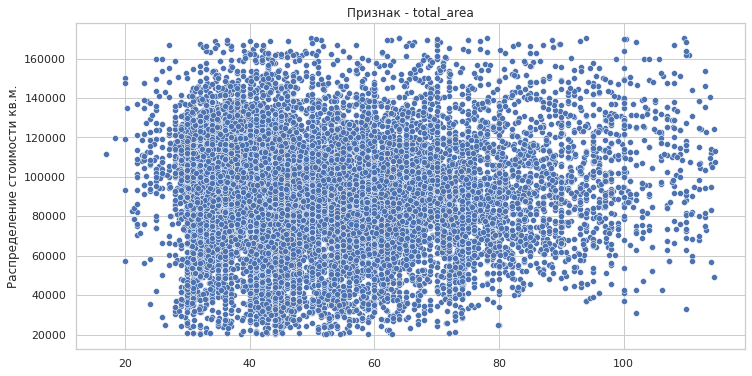

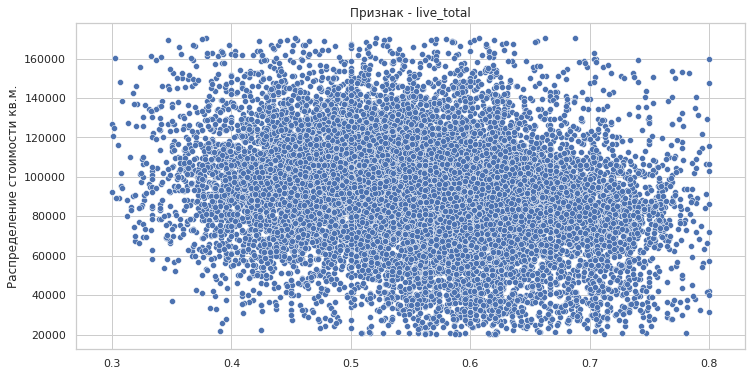

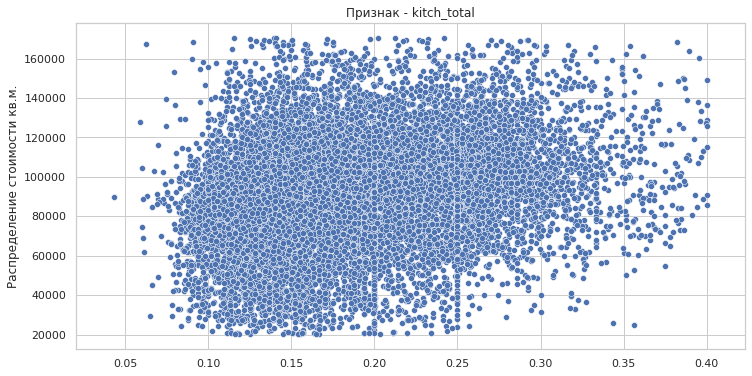

In [14]:
# построение  графиков 
for f in list_scatterplot:
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12,6))
    g = sns.scatterplot(data=df_good, x=df[f], y='price_per_m2')
    plt.title(f'Признак - {f}')
    plt.ylabel("Распределение стоимости кв.м.")
    plt.xlabel("")
    plt.show()

Вывод

Изучение взаимосвязи цены за метр кв. к:
- кол-во комнат: взаимосвязь слабая(0,02), наблюдается снижение цен до 5 комнат, дальше повышение;
- близость к центру: самая высокая корреляция, хотя все еще слабая.Чем ближе к центру, тем дороже (0,4);
- общая пл.: низкий коэф корр., чем больше площадь, тем дороже.
- соотношения жилой к общей и кухни к общей: имеют примерно одинаковый коэф. корреляции (0,2 и 0,3). Отметим странность, чем больше соотношение жилой площади к общей, тем меньше цена .
- день недели: данный показатель почти не влияет на цену, самы дорогие квартиры размещаются по ср, а дешовые по сб;
- месяц: также имеется очень низкий коэффициент корреляции, самые дешовые квартиры выставляют в июне, самые  дорогие в аврусте;
- год: показатель имеет большее влияние на цену, чем день недели или месяц, но все так же является очень низким. Чем позже дата, тем больше цена;
- этаж: самы дешовые квартиры находятся на первом этаже, далее идут кв. на последнем, больше всего цена на квартиры в середине дома.

### 10 населённых пунктов с наибольшим числом объявлений

In [15]:
df_good_city = df_good.pivot_table(index='locality_name', values='price_per_m2', aggfunc=['count', 'mean', 'median']) #группировка по локации 
df_good_city.columns=['count', 'mean', 'median'] #переименование столбцов
df_good_city = df_good_city.sort_values(by='count', ascending =False).head(10) #сортировка данных 

Вывод

На первом месте по кол-ву объявлений находется Спб, что не удивительно, он же имеет наибольшую средную цену. Наименьшая цена за кв.м. в Всеволожске, который стоит на 2ом месте по кол-ву объявлений.

### Определение центральной зоны

,price_per_m2,rooms,cityCenters_nearest,ceiling_height,total_area,live_total,kitch_total,weekday,year,month
count,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,110046.360606,2.530303,2758.748485,2.77247,69.734000,0.598185,0.162617,2.633333,2017.145455,6.869697
std,22200.986723,0.932684,954.032772,0.15790,20.703084,0.086332,0.055561,1.797189,0.880415,3.491804
min,63524.000000,1.000000,399.000000,2.50000,20.000000,0.325581,0.062500,0.000000,2015.000000,1.000000
25%,92018.500000,2.000000,2044.250000,2.65000,53.700000,0.540000,0.123995,1.000000,2017.000000,4.000000
50%,106864.500000,2.000000,3036.500000,2.75000,69.200000,0.600000,0.149888,3.000000,2017.000000,7.000000
75%,125159.000000,3.000000,3557.750000,2.90000,85.000000,0.661792,0.190704,4.000000,2018.000000,10.000000
max,170312.000000,6.000000,3996.000000,3.05000,113.900000,0.794118,0.394737,6.000000,2019.000000,12.000000


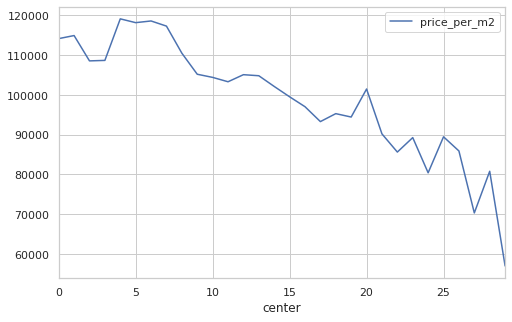

In [16]:
df_good_sp=df_good.query('locality_name == "санкт-петербург"') # выделение квартир в Санкт-Петербурге
df_good_sp['center']=df_good_sp['cityCenters_nearest'] / 1000 #перевод в км.
df_good_sp.dropna(subset = ['cityCenters_nearest'], inplace = True) #удаление пропусков
df_good_sp['center']=df_good_sp['center'].astype('int') #замена типа данных на целочисленной 
df_good_sp_pivot=df_good_sp.pivot_table(index='center', values='price_per_m2', aggfunc='mean').plot(y='price_per_m2', grid=True, figsize = (8,5)) #группировка по удаленности от центра и построение графика

df_good_sp_center = df_good_sp.query('center <= 3') # выделение сегмента квартир в центре
df_good_sp_center_stat = df_good_sp_center.loc[:,['price_per_m2', 'rooms', 'cityCenters_nearest','ceiling_height', 'floor_category','total_area','live_total', 'kitch_total', 'weekday','year','month']]  #
df_good_sp_center_stat.describe() #описание данных



 **Вывод**

При рассмотрении сводной таблицы по СПб можно заметить, что цена резко уменьшается после 3х км, будем счтитать, что здесь заканчивается центр.

### Анализ сегмента квартир в центре

In [17]:
df_good_sp_center_stat.describe() #исследование данных по квартирам в центре

,price_per_m2,rooms,cityCenters_nearest,ceiling_height,total_area,live_total,kitch_total,weekday,year,month
count,330.000000,330.000000,330.000000,330.00000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,110046.360606,2.530303,2758.748485,2.77247,69.734000,0.598185,0.162617,2.633333,2017.145455,6.869697
std,22200.986723,0.932684,954.032772,0.15790,20.703084,0.086332,0.055561,1.797189,0.880415,3.491804
min,63524.000000,1.000000,399.000000,2.50000,20.000000,0.325581,0.062500,0.000000,2015.000000,1.000000
25%,92018.500000,2.000000,2044.250000,2.65000,53.700000,0.540000,0.123995,1.000000,2017.000000,4.000000
50%,106864.500000,2.000000,3036.500000,2.75000,69.200000,0.600000,0.149888,3.000000,2017.000000,7.000000
75%,125159.000000,3.000000,3557.750000,2.90000,85.000000,0.661792,0.190704,4.000000,2018.000000,10.000000
max,170312.000000,6.000000,3996.000000,3.05000,113.900000,0.794118,0.394737,6.000000,2019.000000,12.000000


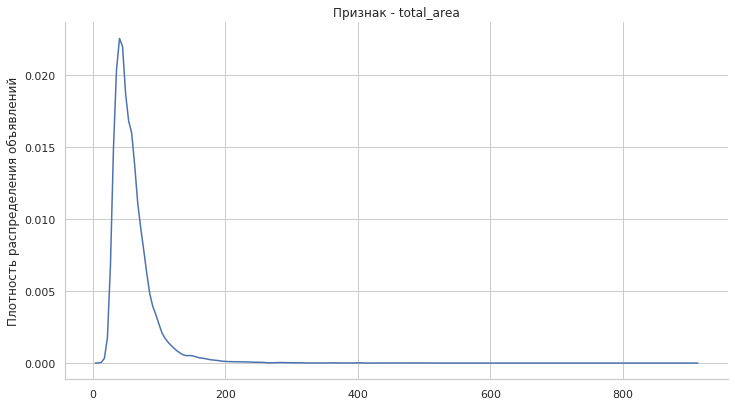

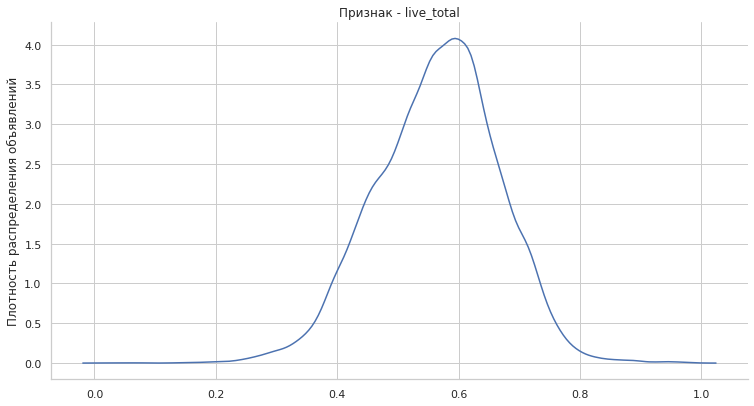

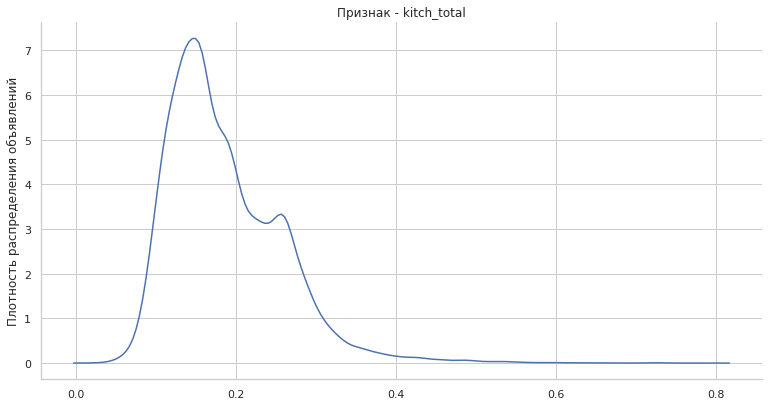

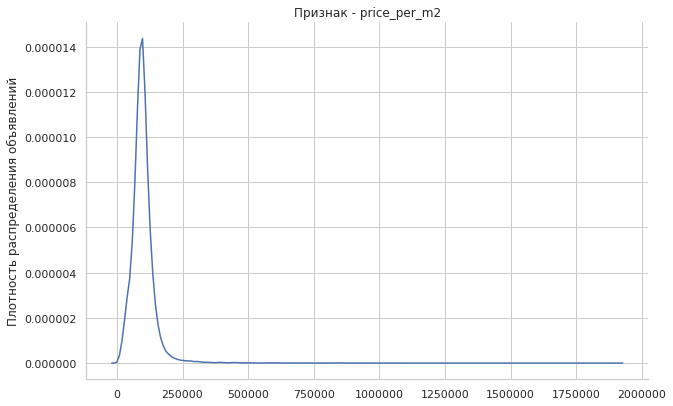

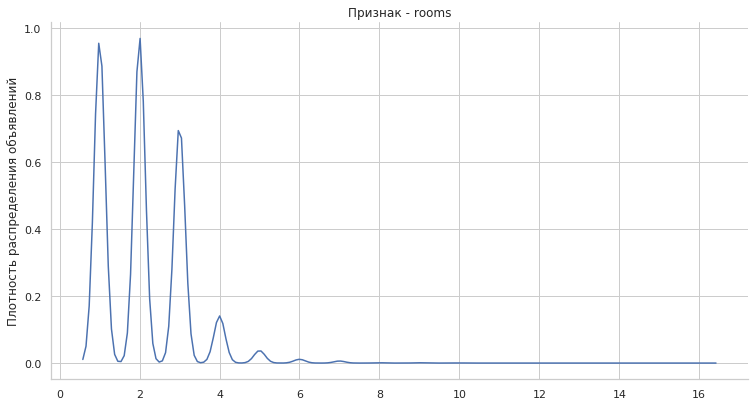

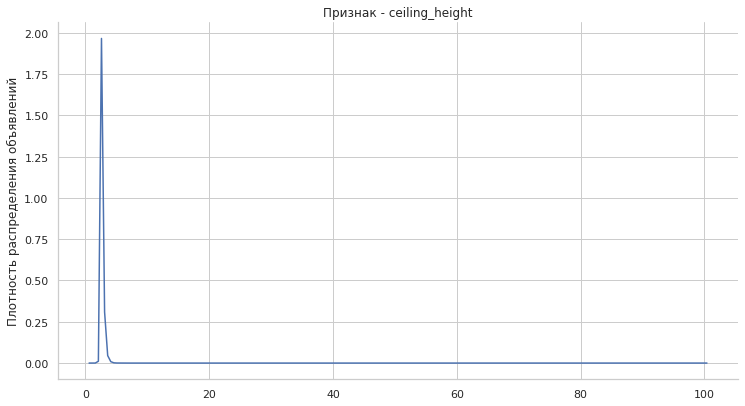

In [18]:
# построение графиков 
for f in list_displot:
    sns.set_style("whitegrid")
    g = sns.displot(data=df_good_sp_center_stat, x=df[f], kind='kde' )
    plt.title(f'Признак - {f}')
    plt.ylabel("Плотность распределения объявлений")
    plt.xlabel("")
    g.fig.set_figwidth(12)
    g.fig.set_figheight(6)
    plt.show()

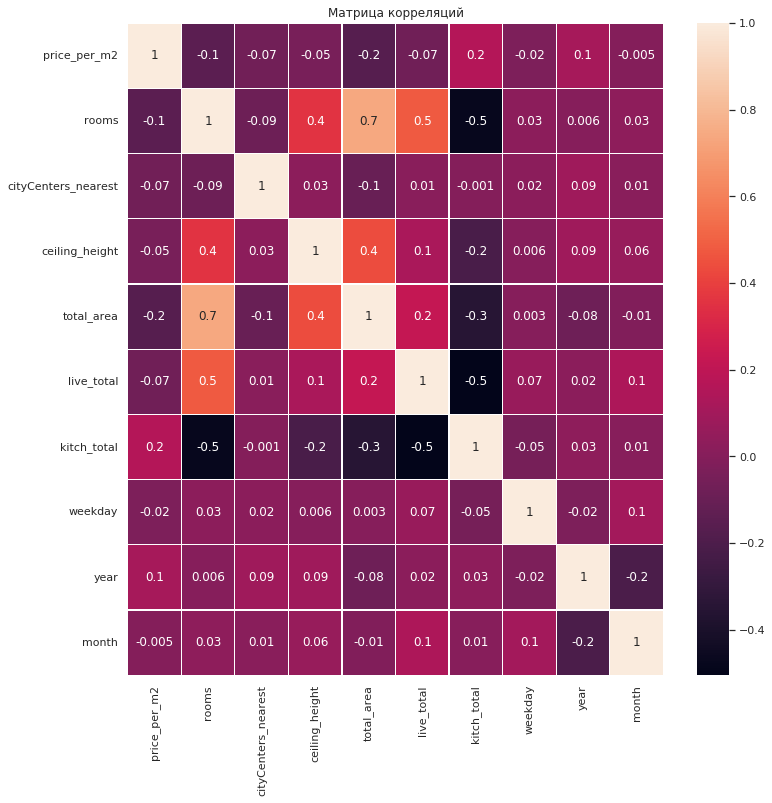

In [19]:
#построение таблицы коэффициентов корреляции
sns.set(style='white')
plt.figure(figsize=(12, 12))
plt.title('Матрица корреляций')
sns.heatmap(df_good_sp_center_stat.corr(), annot=True, fmt='.1g', linewidths=0.25, linecolor='white') 
plt.show()

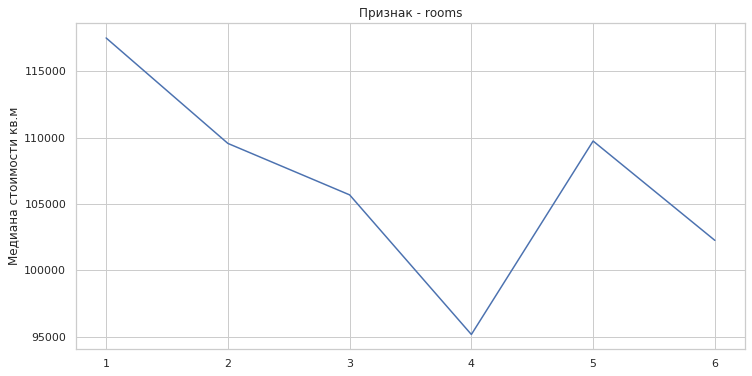

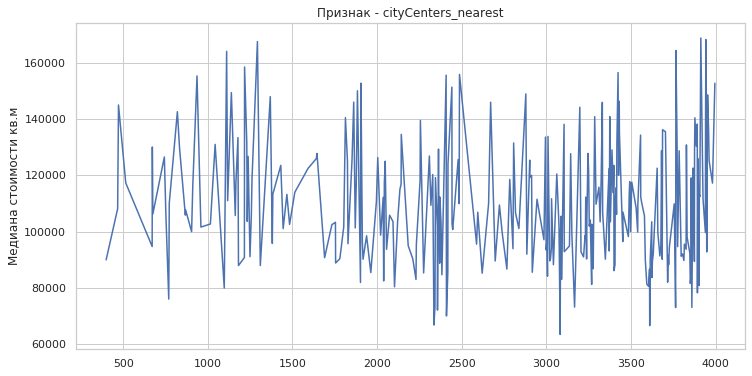

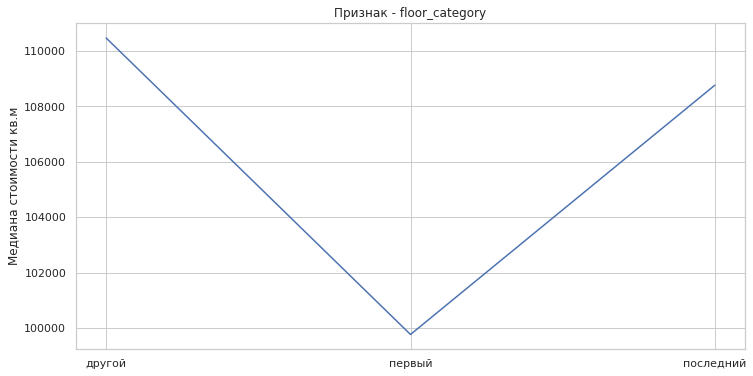

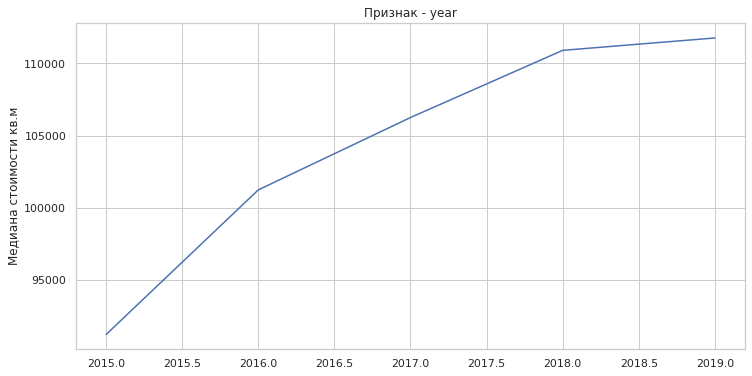

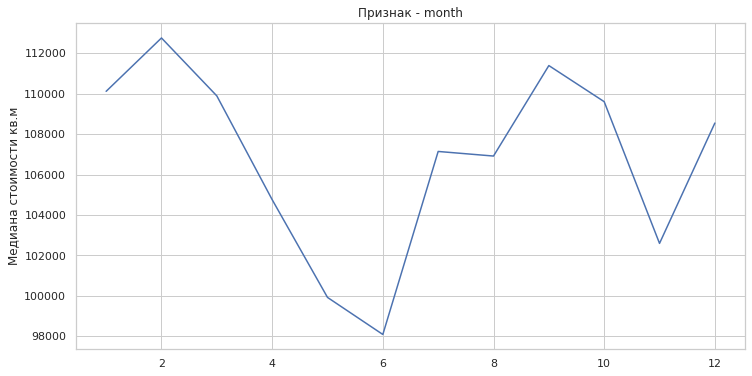

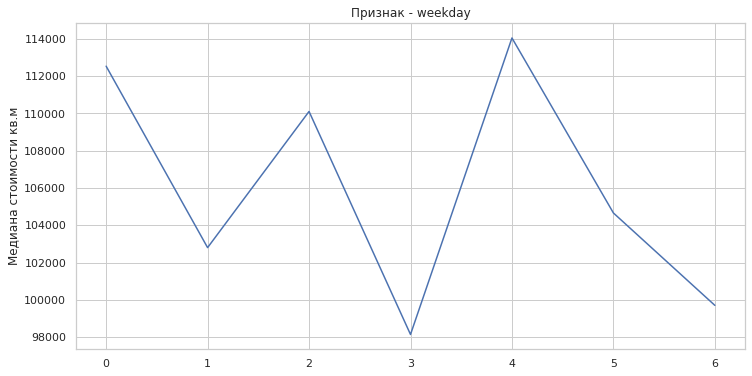

In [20]:
# построение линейных графиков 
for f in list_lineplot:
    new_df=df_good_sp_center_stat.pivot_table(index=df[f], values='price_per_m2', aggfunc='median')
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12,6))
    g = sns.lineplot(data=new_df, x=new_df.index, y='price_per_m2')
    plt.title(f'Признак - {f}')
    plt.ylabel("Медиана стоимости кв.м")
    plt.xlabel("")
    plt.show()

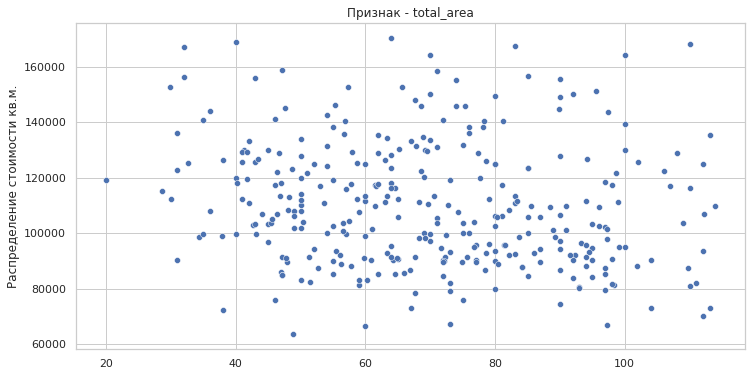

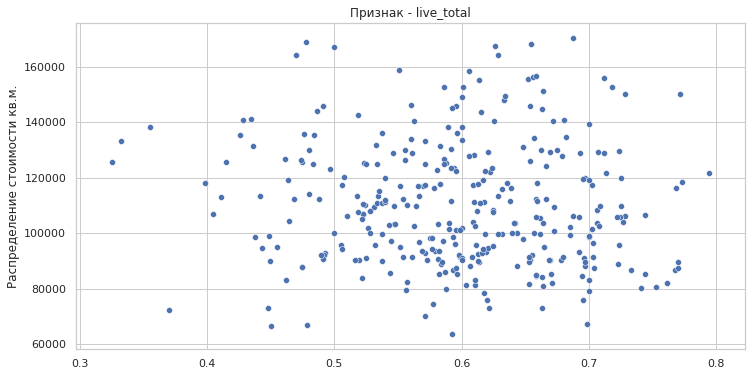

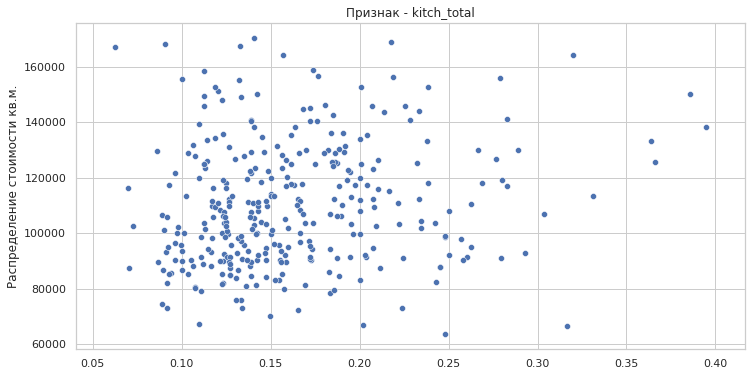

In [21]:
# построение  графиков 
for f in list_scatterplot:
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12,6))
    g = sns.scatterplot(data=df_good_sp_center_stat, x=df[f], y='price_per_m2')
    plt.title(f'Признак - {f}')
    plt.ylabel("Распределение стоимости кв.м.")
    plt.xlabel("")
    plt.show()

Вывод

Данные в столбце общей площади имеют нормальное распределение, медиана и среднее имеют расхождение равны 69 и 85 м.кв. соответсвенно.

Данные в столбце соотношения жилой площади к общей имеют нормальное распределение, медиана и среднее равны примерно 0,6.

Данные в столбце соотношения площади кухни к общей имеют нормальное распределение, медиана и среднее имеют близкое значение, равное 0,15 и 0,16 соответственно.

Данные в столбце цены за м.кв. имеют нормальное распределение, медиана и среднее близки равны 106 тыс. за кв.м и 110 тыс. за кв.м. .

Данные в столбце кол-ва комнат имеют нормальное распределение, медиана и среднее равны 3.

Данные в столбце высоты поталка имели бы нормальное распределение, но наблюдается резкий скачек на 3 метрах, медиана и среднее равны 2,75 и 2,77.

Изучение взаимосвязи цены за метр кв. к:
- кол-во комнат: взаимосвязь слабая(0,06), но больше, чем во всей области. С 1 до 4 комнат наблюдается снижение, далее до резкого скачека цены на 7 комнатах наблюдается плавное снижение, заметноже резкое уменьшение цены на 9;
- высота потолков: коэф. равен -0,05, что странно, ведь это знасчит, что чем ниже потолок, тем дороже квартира, график тожене выявляет никаких особенностей.
- день недели: данный показатель почти не влияет на цену, самы дорогие квартиры размещаются по ср, а дешовые по вс;
- месяц: также имеется очень низкий коэффициент корреляции, самые дешовые квартиры выставляют в июне, самые  дорогие в январе;
- год: показатель имеет большее влияние на цену, чем день недели или месяц, но все так же является очень низким. Чем позже дата, тем больше цена;
- этаж: самы дешовые квартиры находятся на первом этаже, далее идут кв. на последнем, больше всего цена на квартиры в середине дома.

## Общий вывод

Можно выделить сл. факторы, которые имеют наибольшее влияниена цену за м.кв.: близость к центру, площадь квартиры, этаж, соотношение жилой к общей и куханной к общей площалей. Положительный коэф. корреляции имеют площадь квартиры и соотношения площадей, а отрицательный - близость к центру. Больше ценятся те квартиры, которые находятся не на первом и последнем этажах.
Стоит заметить, что влияние этих параметров немного отличается в центре и остальной области.